<a href="https://colab.research.google.com/github/khoa030602/AI-21-4-23/blob/main/AI_21_4_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mtcnn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.6 MB/s eta 0:00:00


3/3 [==============================] - 0s 38ms/step
{'box': [32, 67, 18, 23], 'confidence': 0.9998300075531006, 'keypoints': {'left_eye': (38, 77), 'right_eye': (47, 76), 'nose': (43, 82), 'mouth_left': (38, 85), 'mouth_right': (46, 84)}}
{'box': [88, 115, 15, 20], 'confidence': 0.9997584819793701, 'keypoints': {'left_eye': (91, 123), 'right_eye': (99, 123), 'nose': (95, 128), 'mouth_left': (92, 131), 'mouth_right': (99, 130)}}
{'box': [179, 52, 13, 15], 'confidence': 0.9997460842132568, 'keypoints': {'left_eye': (182, 56), 'right_eye': (189, 56), 'nose': (186, 61), 'mouth_left': (182, 63), 'mouth_right': (189, 63)}}
{'box': [128, 86, 18, 23], 'confidence': 0.9995593428611755, 'keypoints': {'left_eye': (133, 95), 'right_eye': (142, 95), 'nose': (138, 101), 'mouth_left': (134, 103), 'mouth_right': (142, 103)}}
{'box': [206, 109, 17, 20], 'confidence': 0.9992275238037109, 'keypoints': {'left_eye': (210, 116), 'right_eye': (218, 116), 'nose': (212, 120), 'mouth_left': (209, 123), 'mouth_r

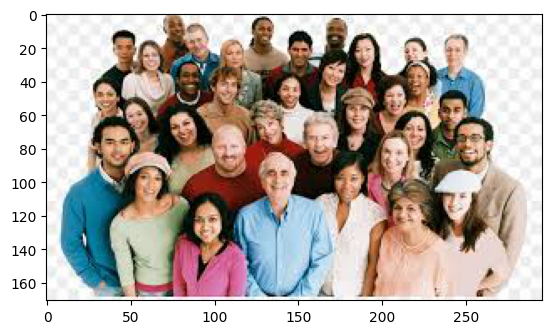

In [ ]:
import decorator
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename='/content/images.jpg'
img=plt.imread(filename)
plt.imshow(img)
dectector=MTCNN()
faces=dectector.detect_faces(img)
for face in faces:
  print(face)

5/5 [==============================] - 1s 56ms/step


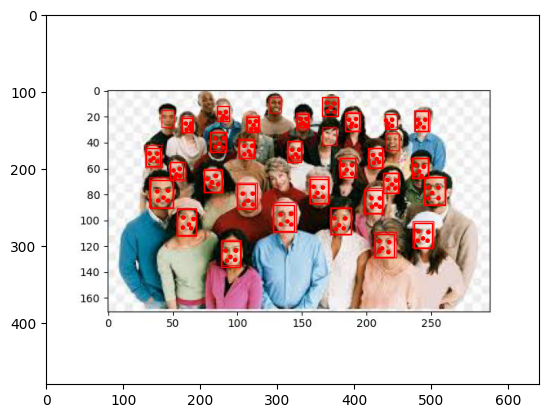

In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename='/content/images.jpg'
img=plt.imread(filename)
dectector=MTCNN()
faces=dectector.detect_faces(img)
plt.imshow(img)
ax=plt.gca()
for face in faces:
  x,y,width,height=face['box']
  rect=plt.Rectangle((x,y),width,height,fill=False,color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot=plt.Circle(value,radius=2,color='red')
    ax.add_patch(dot)
  plt.savefig('/content/images.jpg')
plt.show()

1/1 [==============================] - 0s 108ms/step


2/2 [==============================] - 0s 44ms/step


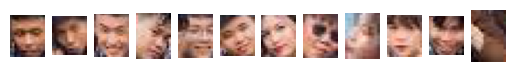

In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
def draw_faces(filename,result_list):
  data=plt.imread(filename)
  for i in range(len(result_list)):
    x1,y1,width,height=result_list[i]['box']
    x2,y2=x1 + width, y1 + height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
plt.show()
filename='/content/images (1).jpg'
img=plt.imread(filename)
dectector=MTCNN()
faces=dectector.detect_faces(img)
draw_faces(filename,faces)


1/1 [==============================] - 1s 1s/step
Predicted: [('n02480495', 'orangutan', 0.9938665), ('n02486261', 'patas', 0.0030395507), ('n02492660', 'howler_monkey', 0.00091449096)]


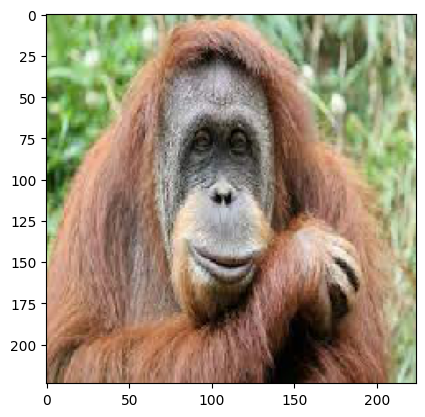

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/duoiuoi.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
plt.imshow(img)

print('Predicted:', decode_predictions(preds, top=3)[0])
plt.show()


1/1 [==============================] - 1s 722ms/step


TypeError: ignored

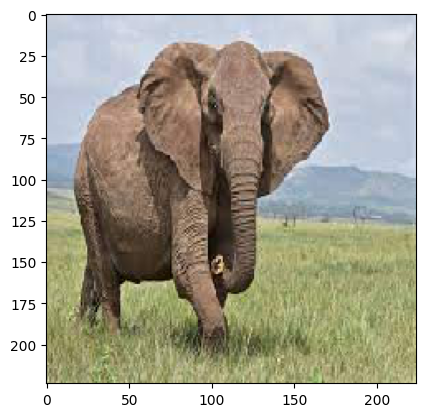

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = '/content/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img)
features = model.predict(x)
print('Predicted:', preprocess_input(features, top=3)[0])

plt.show()

1/1 [==============================] - 1s 680ms/step


ValueError: ignored

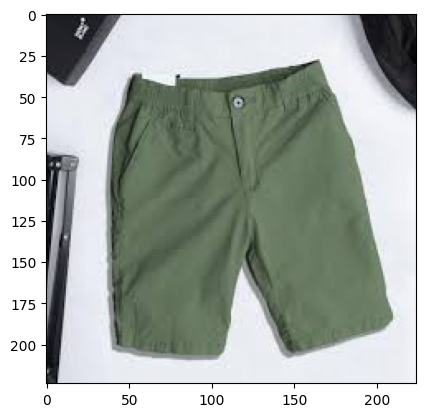

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = '/content/quan.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img)

block4_pool_features = model.predict(x)
print('Predicted:', decode_predictions(block4_pool_features, top=3)[0])
plt.show()